In [1]:
1+1

2

In [3]:
import numpy as np
thrad=0.5
theta=thrad*np.pi
sinth=np.sin(theta)
costh=np.cos(theta)
print('theta =', thrad, '* pi')
print('sin(theta) =',sinth)
print('cos(theta) =',costh)

theta = 0.5 * pi
sin(theta) = 1.0
cos(theta) = 6.123233995736766e-17


# Title level 1
## Title level 2 
### Title level 3

- Item 1
- Item 2

1. Enumerate 1
2. Enumerate 2

$$
\frac{d\mathbf{R}(t)}{dt}=\mathbf{V}(t) \tag{1}
$$
$$
m\frac{d\mathbf{V}(t)}{dt}=-\zeta\mathbf{V}(t)-k\mathbf{R}(t) \t
aq{2}
$$

In [6]:
\begin{equation}
\log N!\simeq N\log N - N
\end{equation}

SyntaxError: unexpected character after line continuation character (<ipython-input-6-58e8e99ab0d3>, line 1)

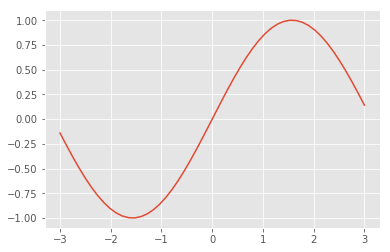

In [12]:
# controls environment settings, use this to create plot inside this window
# % matplotlib inline   
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

x = np.linspace(-3,3)
y = np.sin(x)
plt.plot(x,y)
plt.show()

In [13]:
def func (x,n):
    y = x**n
    return y

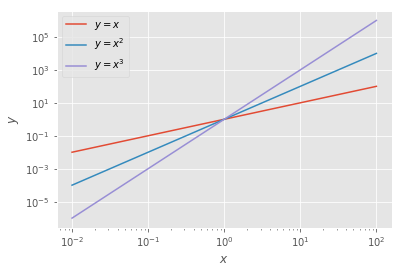

In [14]:
x = np.logspace(-2,2)
plt.plot(x, func(x,1), label='$y=x$')
plt.plot(x, func(x,2), label='$y=x^2$')
plt.plot(x, func(x,3), label='$y=x^3$')
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

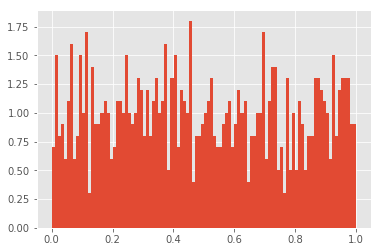

In [19]:
N = 1000
np.random.seed(0) #initialize the random number generator
R = np.random.rand(N)
plt.hist(R, bins=100, density=True)
plt.show()

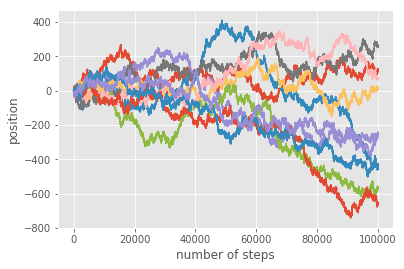

In [18]:
NSTEP = 100000 # number of random steps 
plt.xlabel('number of steps')
plt.ylabel("position")
for nseed in range(10): # generate 10 random walks 
    # initialize random step generator with different nseeds 
    np.random.seed(nseed)
    # generate random sequencies of NSTEP +1/-1 steps
    step = np.random.choice([-1,1], NSTEP)
    # calculate position of random walk at each step
    position = np.cumsum(step)
    plt.plot(position)

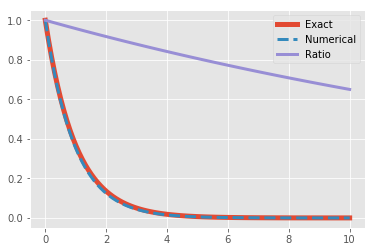

In [20]:
# Euler method 
dt, tmin, tmax = 0.1, 0.0, 10.0 # set \Delta t,t0,tmax
step=int((tmax-tmin)/dt)

#create array t from tmin to tmax with equal interval dt
t = np.linspace(tmin,tmax,step)
y = np.zeros(step) # initialize array y as all 0
ya = np.exp(-t) # analytical solution y=exp(-t)
plt.plot(t,ya,label='Exact',lw=5) # plot y vs. t (analytical)
y[0]=1.0 # initial condition

for i in range(step-1):
    y[i+1]=y[i]-dt*y[i] # Euler method Eq.(A8)

plt.plot(t,y,ls='--',lw=3,label='Numerical') # plot y vs t (numerical)
plt.plot(t,y/ya,lw=3,label='Ratio') # plot y/ya vs. t
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


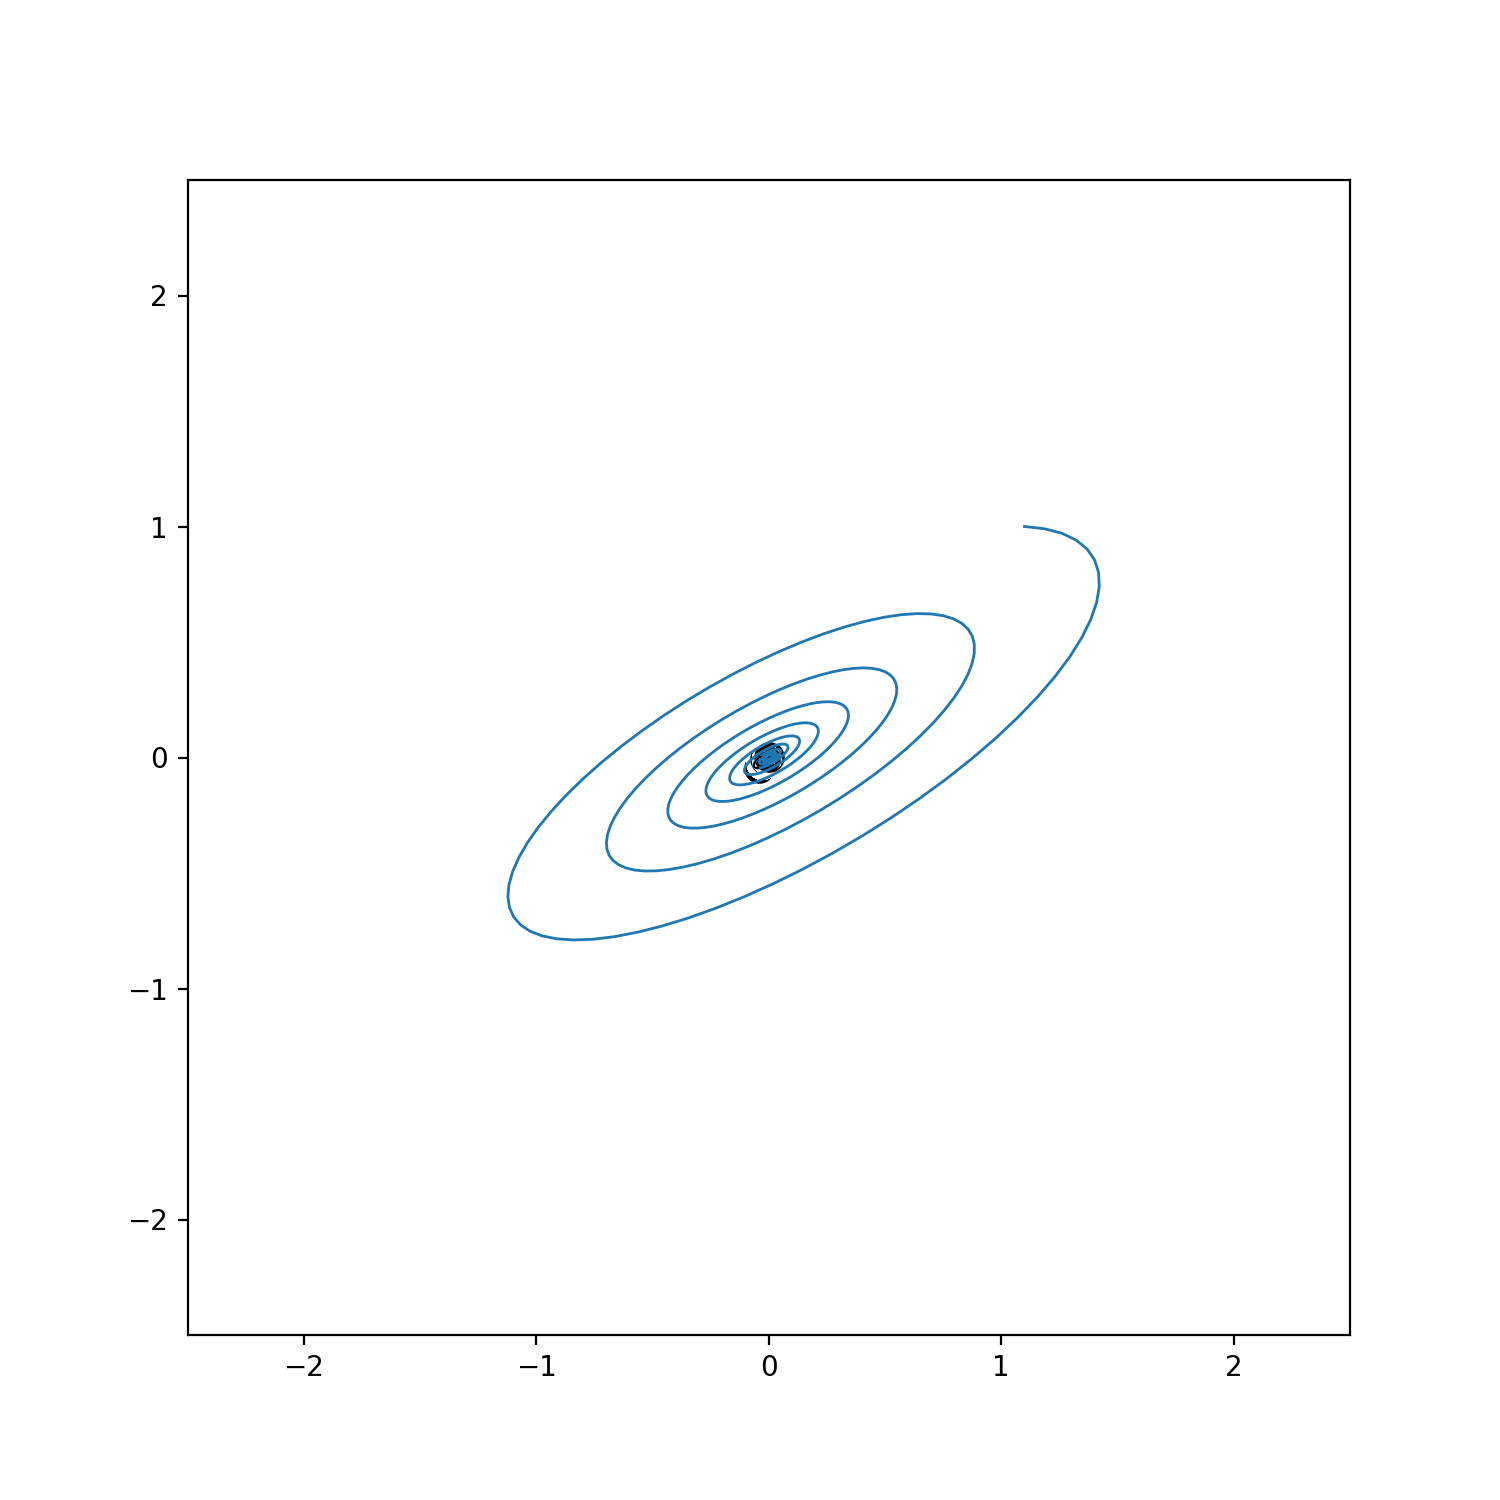

In [3]:
# Simulating a damped harmonic oscillator 
% matplotlib nbagg
import matplotlib.animation as animation
import numpy as np 
import matplotlib.pyplot as plt

dim = 2 # system dimension (x,y)
nums = 1000 # number of steps 
R = np.zeros(dim) # particle position
V = np.zeros(dim) # particle velocity
Rs = np.zeros([dim,nums]) # particle position (at all steps)
Vs = np.zeros([dim,nums]) # particle velocity (at all steps)
Et = np.zeros(nums) # total energy of the system (at all steps)
time = np.zeros(nums) # time (at all steps )

# Animation functions 
def init(): # initialize animation
    particles.set_data([], [])
    line.set_data([], [])
    title.set_text(r'')
    return particles,line,title

def animate(i): # define animation using Euler, updates simulation by performing a time integration 
    global R,V,F,Rs,Vs,time,Et
    R, V = R+V*dt, V*(1-zeta/m*dt)-k/m*dt*R # Euler method Eqs. 
    Rs[0:dim, i]=R
    Vs[0:dim, i]=V
    time[i]=i*dt
    Et[i]=0.5*m*np.linalg.norm(V)**2+0.5*k*np.linalg.norm(R)**2
    particles.set_data(R[0], R[1]) # current position
    line.set_data(Rs[0,0:i], Rs[1,0:i]) # add latest position Rs
    title.set_Data(r"$t = {0:.2f}, E_T = {1:.3f}$".format(i*dt,Et[i]))
    return particles,line,title

# Perform simulation 
# System parameters | particle mass, spring & friction constants
m, k, zeta = 1.0, 1.0, 0.25
# Initial Condition 
R[0], R[1] = 1., 1. # Rx(0), Ry(0)
V[0], V[1] = 1., 0. # Vx(0), Vy(0)
dt = 0.1*np.sqrt(k/m) #set \Delta t
box = 5 # set size of draw area 

# set up the figure, axis, and plot element for animation
fig, ax = plt.subplots(figsize=(7.5,7.5)) # setup plot 
ax = plt.axes(xlim=(-box/2, box/2), ylim=(-box/2, box/2)) # draw range
particles, = ax.plot([],[], 'ko', ms=10) # setup plot for particle 
line,=ax.plot([],[],lw=1) # setup plot for trajectory 
title=ax.text(0.5,1.05,r'', transform=ax.transAxes,va='center') # title
anim=animation.FuncAnimation(fig,animate,init_func=init,
                            frames=nums,interval=5,blit=True,repeat=False) # draw animation
# anim.save('movie.mp4',fps=20,dpi=400)


<IPython.core.display.Javascript object>


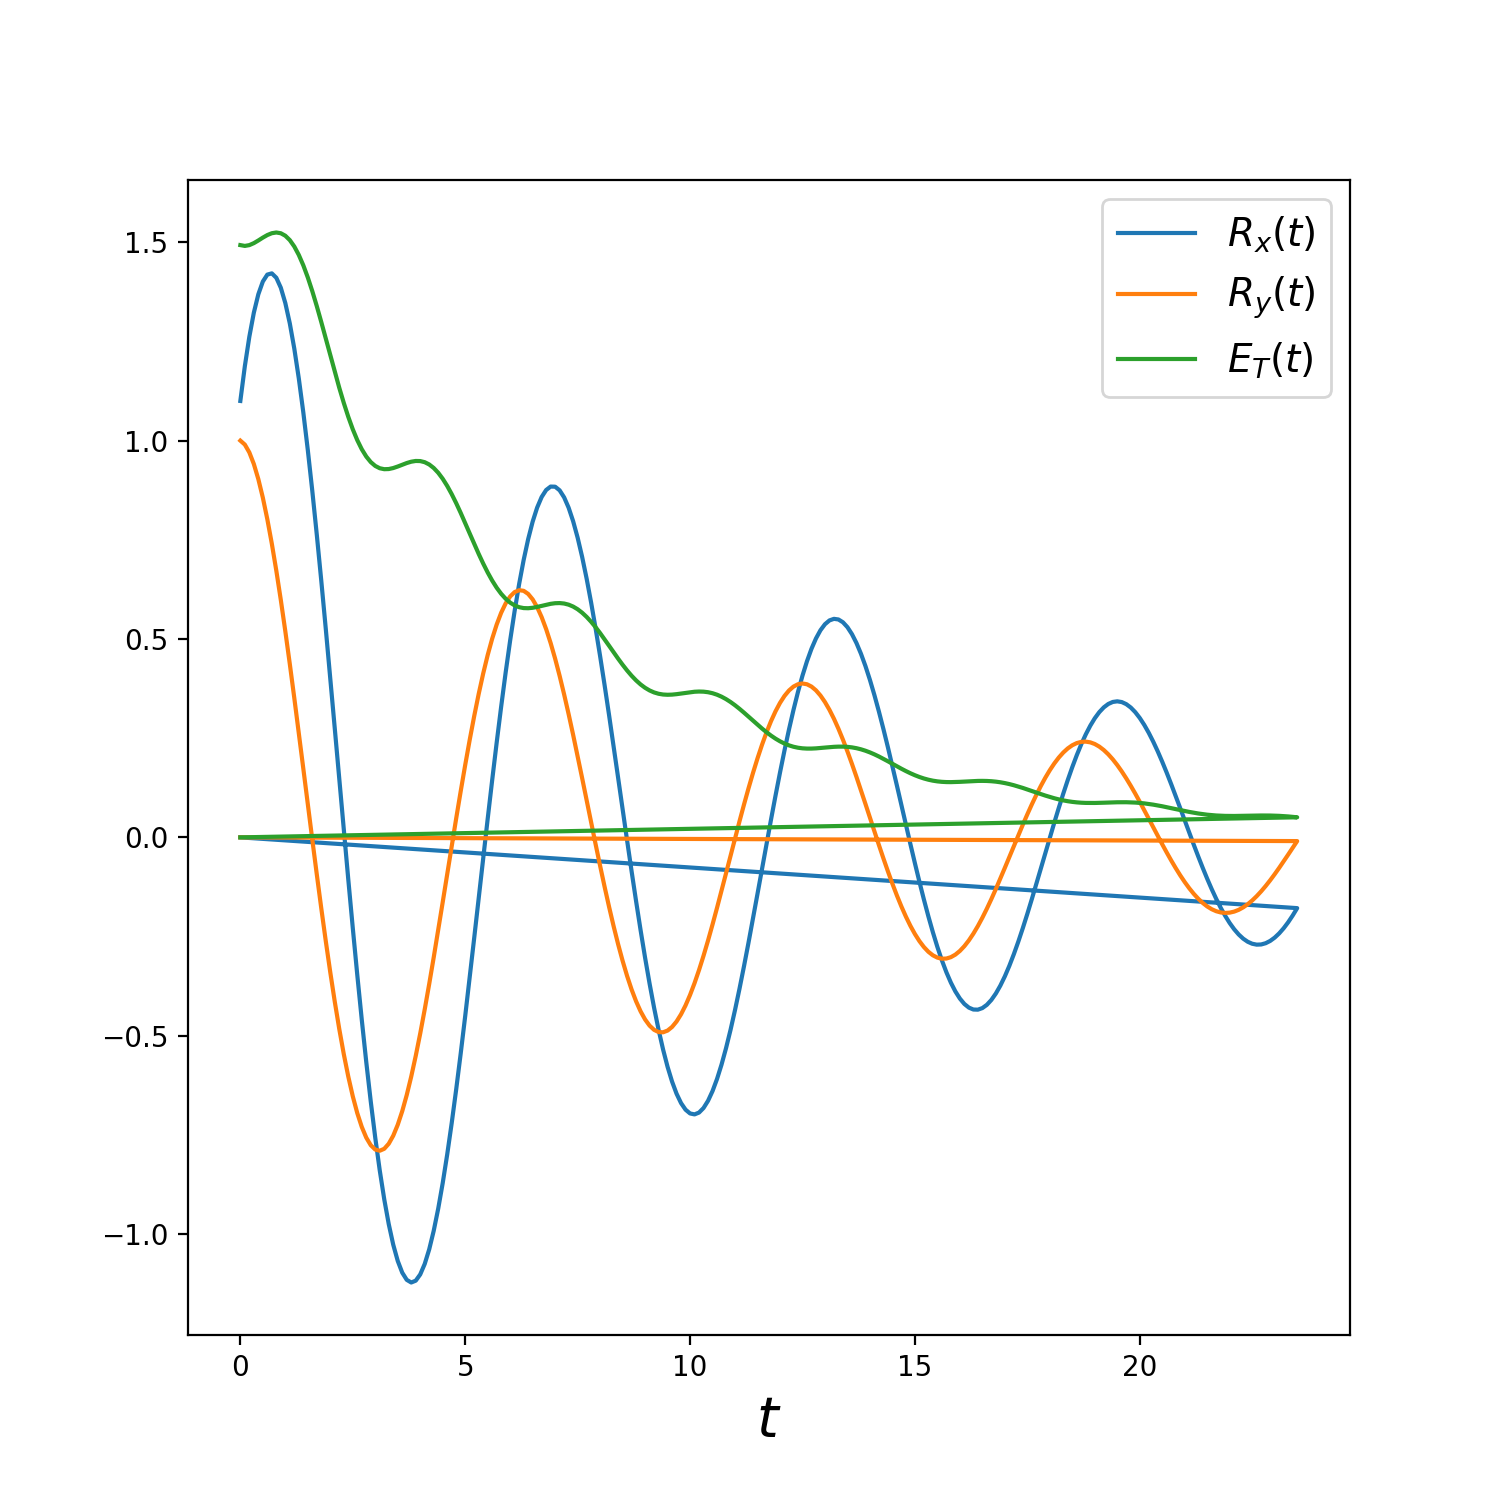

In [4]:

# Total energy of the harmonic oscillator
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$t$", fontsize=20)
ax.plot(time,Rs[0]) # plot R_x(t)
ax.plot(time,Rs[1]) # plot R_y(t)
ax.plot(time,Et) # plot E(t) (ideally constant if \delta=0)
ax.legend([r'$R_x(t)$', r'$R_y(t)$', r'$E_T(t)$'], fontsize=14)
plt.show()